In [138]:
import numpy as np
import pandas as pd
import seaborn as sns 
from os import getcwd
from os.path import dirname 

import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import matplotlib.lines as mlines
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [150]:
# define path
path = dirname(getcwd()) + '/'

# get data for plotting 
corrs_turku = dict(np.load(path + 'data/corrs_turku.npz'))
corrs_turku = pd.DataFrame(corrs_turku).transpose()
corrs_turku.columns = ['rho', 'pspin']

nulls_turku = dict(np.load(path + 'data/nulls_turku.npz'))

corrs_enigma= dict(np.load(path + 'data/corrs_enigma.npz'))
nulls_enigma = dict(np.load(path + 'data/nulls_enigma.npz'))

target_labels = pd.read_csv(path + 'data/target_labels.csv')
alt_target_labels = pd.read_csv(path + 'data/alt_target_labels.csv')

# merge, fdr correction, display discovery sample

In [154]:
# merge source labels etc for plotting and results 
df_turku = pd.merge(target_labels, corrs_turku, left_on='source', right_index=True)

# do multiple comparisons correction
_, fdr_corrected_pvalues, _, _ = multipletests(df_turku['pspin'], alpha=0.05, method='fdr_bh')
df_turku['fdr_corrected_p_value'] = fdr_corrected_pvalues

# show 
display(df_turku)

# save
df_turku.to_csv(path + '/tables/correlations_in_discovery_sample.csv')

,source,class,target,rho,pspin,fdr_corrected_p_value
0,kaller2017_sch23390,dopamine,D1,-0.136113,0.252275,0.315343
1,jaworska2020_fallypride,dopamine,D2,-0.151458,0.164884,0.215065
2,beliveau2017_dasb,serotonin,5-HTT,-0.404191,0.001800,0.007714
3,savli2012_way100635,serotonin,5-HT1A,-0.223089,0.067293,0.106253
4,beliveau2017_az10419369,serotonin,5-HT1B,0.198970,0.109589,0.149440
5,beliveau2017_cimbi36,serotonin,5-HT2A,0.377866,0.001200,0.007199
6,beliveau2017_sb207145,serotonin,5-HT4,0.275148,0.018998,0.035621
7,radnakrishnan2018_gsk215083,serotonin,5-HT6,0.064869,0.593041,0.635401
8,tuominen_feobv,acetylcholine,vAChT,-0.321012,0.006299,0.017180
9,hillmer2016_flubatine,acetylcholine,$\alpha4 \beta2*$,0.366287,0.004900,0.014999


# plot discovery sample 

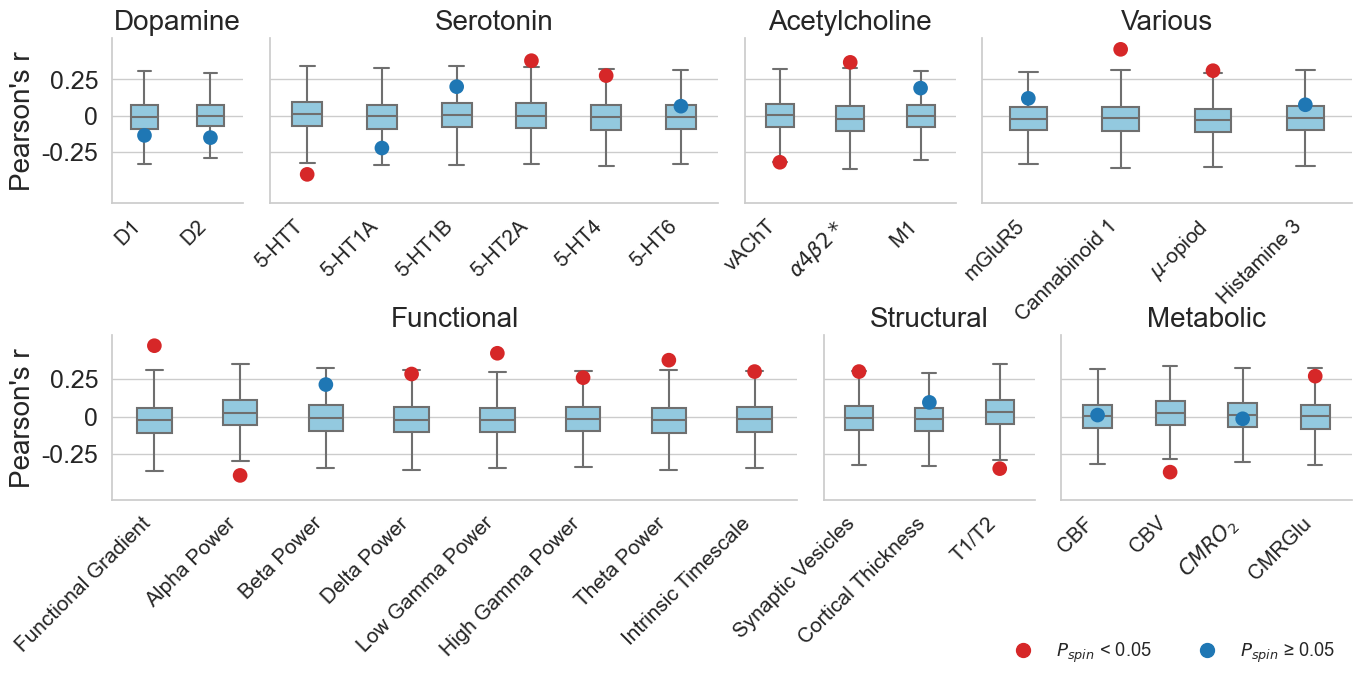

In [183]:
# make subplots in this order  
plot_order = ["dopamine", "serotonin", "acetylcholine", "various", "functional", "structural", "metabolic"]

fig = plt.figure(figsize=(16,6))
gs = fig.add_gridspec(2, 16, hspace=0.8, wspace=0.5)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

f_ax1 = fig.add_subplot(gs[0, 0:2]) # dopamine
f_ax2 = fig.add_subplot(gs[0, 2:8], sharey=f_ax1) # 5-HT
f_ax3 = fig.add_subplot(gs[0, 8:11], sharey=f_ax1) # ACh
f_ax4 = fig.add_subplot(gs[0, 11:], sharey=f_ax1) # various

f_ax5 = fig.add_subplot(gs[1, 0:9]) # functional
f_ax6 = fig.add_subplot(gs[1, 9:12], sharey=f_ax5) # structural
f_ax7 = fig.add_subplot(gs[1, 12:], sharey=f_ax5) # metabolic

sns.set(font_scale=1.2)
sns.set_style("whitegrid")

for i,ax in enumerate(fig.get_axes()):
    corrs = df_turku[df_turku['class'] == plot_order[i]]
    nulls = pd.DataFrame(np.column_stack([nulls_turku.get(s) for s in corrs['source']]))
    nulls.columns = list(corrs['source'])

    color = ((corrs['pspin'] > 0.05).astype(int)).tolist()
    color = [(0.839, 0.152, 0.156) if c == 0 else (0.121, 0.466, 0.705) for c in color]
    
    x = np.arange(corrs.shape[0])
    cpalette = dict(zip(x, color))
    
    ax1 = sns.boxplot(data=nulls, width=0.4, fliersize=0, color ='skyblue', ax=ax);
    ax2 = sns.pointplot(x=x,
                  y=corrs['rho'],
                  palette=cpalette,
                  join = False , 
                  scale=1.2,
                  ax=ax1);

    # make pretty
    children1 = ax1.get_children()
    children2 = ax2.get_children()

    # Set the zorder of the children of the boxplot to 1
    for child in children1:
        child.set_zorder(10)

    # Set the zorder of the children of the pointplot to 2
    for child in children2:
        child.set_zorder(20)

    ax1.set_axisbelow(True)
    
    ax1.set_title(plot_order[i].capitalize(), fontsize=20)
    if i in [0,4]:
        ax1.set(yticks=[-.25, 0, .25])
        ax1.set_yticklabels([ '-0.25', '0', '0.25'], fontsize=30)
        ax1.set_ylabel("Pearson's r", fontsize=20)
        ax1.tick_params(axis='y', labelsize=18)
    else:
        ax1.tick_params(axis='y', which='both', length=0, labelleft=False)
        ax1.set_ylabel(None)
        ax1.spines['left'].set_visible(True)
        
    ax1.set_xticklabels(list(corrs['target']), rotation=45, ha="right", fontsize=15)
    
# legend
blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05' )

plt.legend(handles=[blue_circle, red_circle], frameon=False, bbox_to_anchor=(1, -0.75), ncol=2);

#plt.savefig(path + 'figures/Figure3.jpg', bbox_inches="tight", dpi=300) 

In [192]:
df_turku_alt = pd.merge(alt_target_labels, corrs_turku, left_on='source', right_index=True)
display(df_turku_alt)

,source,class,target,rho,pspin
0,sandiego2015_flb457,dopamine,D2,-0.000058,0.999600
1,fazio2016_madam,serotonin,5-HTT,-0.340886,0.004100
2,beliveau2017_cumi101,serotonin,5-HT1A,-0.031009,0.792221
3,savli2012_p943,serotonin,5-HT1B,0.176320,0.138986
4,savli2012_altanserin,serotonin,5-HT2A,0.036385,0.738126
5,normandin2015_omar,various,Cannabinoid 1,0.344504,0.005099


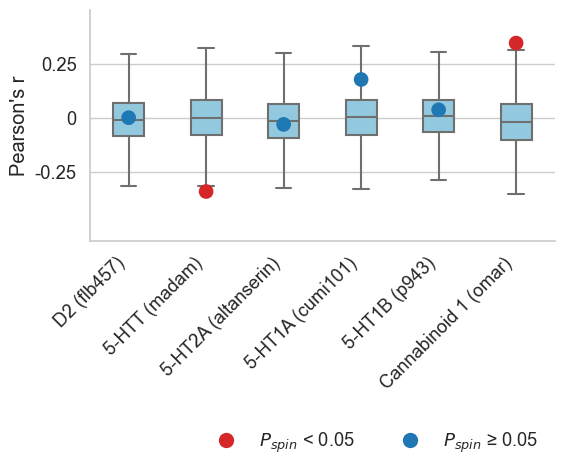

In [191]:
df_turku_alt['xlabel'] = df_turku_alt['target'] + ' (' + [s.split('_')[1] for s in df_turku_alt['source']]  + ')'
nulls = pd.DataFrame(np.column_stack([nulls_turku.get(s) for s in df_turku_alt['source']]))
nulls.columns = list(df_turku_alt['source'])

color = ((df_turku_alt['pspin'] > 0.05).astype(int)).tolist()
color = [(0.839, 0.152, 0.156) if c == 0 else (0.121, 0.466, 0.705) for c in color]

x = np.arange(df_turku_alt.shape[0])
cpalette = dict(zip(x, color))
    
fig = plt.figure(figsize=(6,3))
sns.set_style("whitegrid")

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

ax1 = sns.boxplot(data=nulls, width=0.4, fliersize=0, color ='skyblue')
ax2 = sns.pointplot(x=x,
              y=df_turku_alt["rho"],
              palette=cpalette,
              join = False , 
              scale=1.2,
              ax=ax1);

children1 = ax1.get_children()
children2 = ax2.get_children()

# Set the zorder of the children of the boxplot to 1
for child in children1:
    child.set_zorder(10)

# Set the zorder of the children of the pointplot to 2
for child in children2:
    child.set_zorder(20)

ax1.set_axisbelow(True)

ax1.set(yticks=[-.25, 0, .25], ylabel="Pearson's r")
ax1.set_yticklabels(['-0.25', '0', '0.25'])
ax1.set_xticklabels(xlabel, rotation=45, ha="right")


blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05' )
plt.legend(handles=[blue_circle, red_circle], frameon=False, bbox_to_anchor=(1, -0.75), ncol=2);

#plt.savefig(path + 'figures/Supp_Fig2.jpg', bbox_inches="tight", dpi=300) 

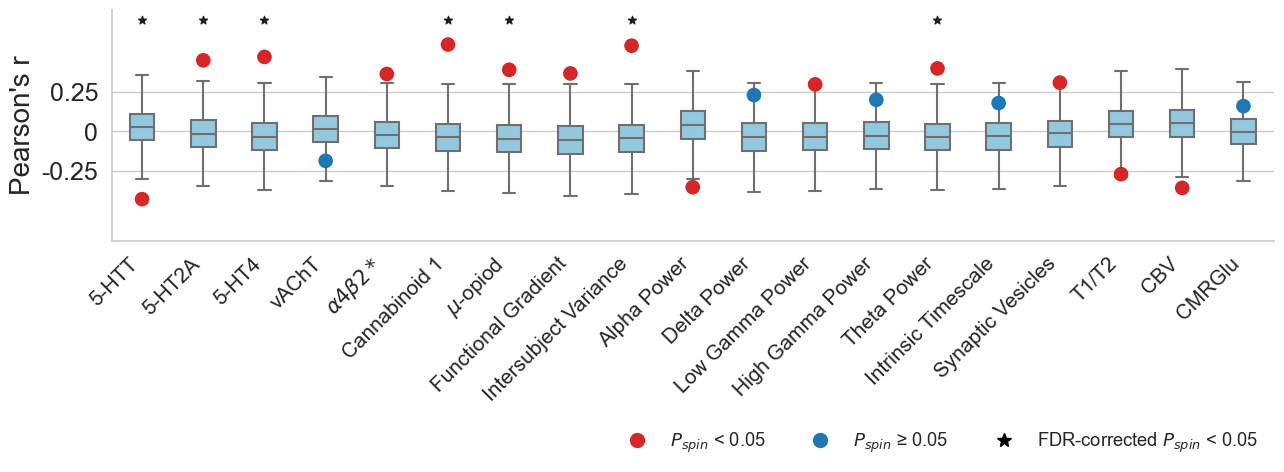

In [14]:
replicate  = ['beliveau2017_dasb','beliveau2017_cimbi36', 'beliveau2017_sb207145', 'tuominen_feobv', 'hillmer2016_flubatine',
              'laurikainen2018_fmpepd2', 'kantonen2020_carfentanil', 'margulies2016_fcgradient01','mueller2013_intersubjvar',  'hcps1200_megalpha', 'hcps1200_megdelta', 
              'hcps1200_meggamma1', 'hcps1200_meggamma2','hcps1200_megtheta', 'hcps1200_megtimescale', 'finnema2016_ucbj', 'hcps1200_myelinmap','raichle_cbv', 
              'raichle_cmruglu']

df_nulls = pd.DataFrame(np.column_stack([nulls_enigma.get(key) for key in replicate]))
df_nulls.columns = replicate

df_corrs = pd.DataFrame([corrs_enigma.get(key) for key in replicate])
xlabel = [change_x_labels[key] for key in df_nulls.columns]

df_corrs.columns = ['rho', 'pspin']
df_corrs['tracers'] = xlabel
_, fdr_corrected_pvalues, _, _ = multipletests(df_corrs['pspin'], alpha=0.05, method='bonferroni')

# add the FDR corrected p-values as a new column to the dataframe
df_corrs['fdr_corrected_p_value'] = fdr_corrected_pvalues
color = ((df_corrs['pspin'] > 0.05).astype(int)).tolist()
color = [(0.839, 0.152, 0.156) if x == 0 else (0.121, 0.466, 0.705) for x in color]
x = np.arange(df_corrs.shape[0])
cpalette = dict(zip(x, color))
    
fig = plt.figure(figsize=(15,3))
sns.set_style("whitegrid")

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False


ax1 = sns.boxplot(data=df_nulls, width=0.4, fliersize=0, color ='skyblue')
ax2 = sns.pointplot(x=x,
              y=df_corrs['rho'],
              palette=cpalette,
              join = False , 
              scale=1.2,
              ax=ax1);

children1 = ax1.get_children()
children2 = ax2.get_children()

# Set the zorder of the children of the boxplot to 1
for child in children1:
    child.set_zorder(10)

# Set the zorder of the children of the pointplot to 2
for child in children2:
    child.set_zorder(20)

ax1.set_axisbelow(True)

ax1.set(yticks=[-.25, 0, .25])

ax1.set_yticklabels(['-0.25', '0', '0.25'])
ax1.set_xticklabels(xlabel, rotation=45, ha="right", fontsize=15)
ax1.set_ylabel("Pearson's r", fontsize=20)
ax1.tick_params(axis='y', labelsize=18)


# annotate those that survive FDR correction 
xstars = np.where(df_corrs['fdr_corrected_p_value'] < 0.05)[0]
ystars = np.ones(len(xstars)) * 0.7
ax = sns.regplot(x=xstars, y=ystars, fit_reg=False, marker="*", color="black")

blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05' )
black_star = mlines.Line2D([], [], color='black', marker='*', linestyle='None',
                          markersize=10, label='FDR-corrected $P_{spin}$ < 0.05' )
plt.legend(handles=[blue_circle, red_circle, black_star], frameon=False, bbox_to_anchor=(1, -0.75), ncol=3)

plt.savefig(path + 'figures/Figure4.jpg', bbox_inches="tight", dpi=300) 

In [13]:
df_corrs

,rho,pspin,tracers,fdr_corrected_p_value
0,-0.427301,0.000400,5-HTT,0.003800
1,0.447239,0.000300,5-HT2A,0.003800
2,0.468571,0.001100,5-HT4,0.004560
3,-0.186156,0.121388,vAChT,0.138016
4,0.361201,0.002900,$\alpha4 \beta2*$,0.006887
5,0.546847,0.000600,Cannabinoid 1,0.003800
6,0.387682,0.002600,$\mu$-opiod,0.006887
7,0.364822,0.006199,Functional Gradient,0.011779
8,0.539416,0.001200,Intersubject Variance,0.004560
9,-0.352202,0.005399,Alpha Power,0.011399
